File data type: <class 'str'>
Number of characters in the data: 4950684
'UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20'
'609,610,610,609,610,610,610,610,610,609,611,612,613,613,614,616,618,618,617,617,617,617,617,617,617\n'

Total number of lines = 3342
Number of rows in table = 3341 (including the header row)
The number of counties = 3340



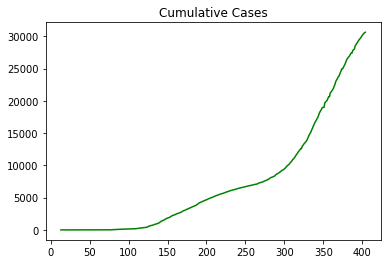

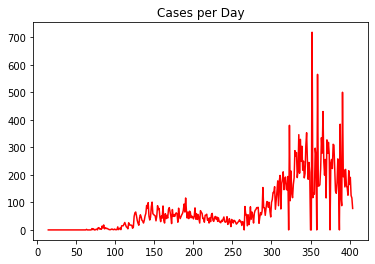

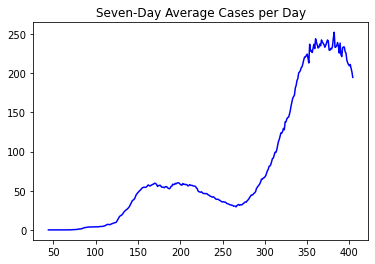

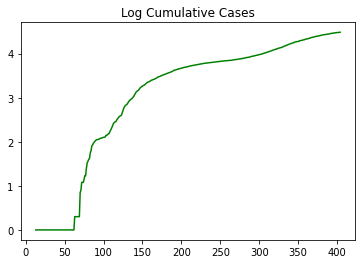

In [ ]:
# scaffold for plotting Covid-19 data
# import libraries of programs to do specific things using pre-written code
import statistics as stats
import math as math
from matplotlib import pyplot as plt
import requests

# urls for data from the Johns Hopkins Covid database
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

data = requests.get(url, {}).text
print('File data type:', type(data))
print('Number of characters in the data:', len(data))
print(repr(data[:100]))
print(repr(data[-100:]))
print()

###########################   MAKE TABLE WITH STRING DATA CONVERTED TO INT DATA

lines = data.split('\n')
print('Total number of lines =', len(lines))

table =[]
for x in range(len(lines)):
  row = lines[x].split(',')
  if len(row) >1:
    table.append(row)
print('Number of rows in table =', len(table), '(including the header row)')

for x in range(1, len(table)):                     # skipping the "0th" or "header" line
  for y in range(13, len(table[x])):
    table[x][y] = int(table[x][y])
print('The number of counties =', len(table)-1)
print()

##############################  FIND COUNTY AND FILL X1, Y1 LISTS AND PLOT
###################  CASES PER DAY (RATES)

plt.title('Cumulative Cases')
x4, y4 = [], []
for x in range(1, len(table)):
  if table[x][5] == "Forsyth" and table[x][6] == "North Carolina" :
    for y in range(13, len(table[x])):                             # you CAN start at 13
      x4.append(y)
      try:  y4.append(table[x][y]  )                   # if the number of cases == 0, the program crashes because the log is (-)infinity 
      except: y4.append(0)
plt.plot(x4, y4, color = 'g')
plt.show()

plt.title('Cases per Day')
x2, y2 = [], []
for x in range(1, len(table)):
  if table[x][5] == "Forsyth" and table[x][6] == "North Carolina" :
    for y in range(14, len(table[x])):                             # must start at 14 not 13!
      x2.append(y)
      y2.append(table[x][y] - table[x][y-1])

plt.plot(x2, y2, color = 'r')
plt.show()

####################   TO SMOOTH OUT PLOT, AVERAGE CASES OVER "STEP" DAYS 

plt.title('Seven-Day Average Cases per Day')
step = 30
x3, y3 = [], []
for x in range(1, len(table)):
  if table[x][5] == "Forsyth" and table[x][6] == "North Carolina" :
    for y in range(14 + step, len(table[x])):                             # must start at 14 not 13!
      x3.append(y)
      y3.append(  (sum(table[x][y-step : y])  - sum(table[x][y-step-1 :y-1]) ) /step   )
plt.plot(x3, y3, color = 'b')
plt.show()

####################   PLOT LOG10 CUMULATIVE CASES TO VISUALLY SPOT CHANGES IN SLOPE

plt.title('Log Cumulative Cases')
x4, y4 = [], []
for x in range(1, len(table)):
  if table[x][5] == "Forsyth" and table[x][6] == "North Carolina" :
    for y in range(13, len(table[x])):                             # you CAN start at 13
      x4.append(y)
      try:  y4.append(math.log10(table[x][y])  )                   # if the number of cases == 0, the program crashes because the log is (-)infinity 
      except: y4.append(0)
plt.plot(x4, y4, color = 'g')
plt.show()
